In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import mplcyberpunk
import matplotlib.ticker as mtick
import numpy as np

In [18]:
df = pd.read_csv('MCAR_Simulation_Top5 (neu)')
# df = pd.read_csv('MNAR_Simulation_Top5_(0.1 und 0.1-0.9)')
# df = pd.read_csv('MNAR_Simulation_Top5_(0.2 und 0.1-0.9)')
# df = pd.read_csv('MNAR_Simulation_Top5_(0.3 und 0.1-0.9)')
df.rename(columns={'Unnamed: 0': 'chance'}, inplace=True)
df

,chance,Mean,MSE OLS,SE OLS,Alpha OLS,Mean KNN_1,MSE KNN_1,SE KNN_1,Alpha KNN_1,Mean KNN_3,MSE KNN_3,SE KNN_3,Alpha KNN_3,Mean KNN_5,MSE KNN_5,SE KNN_5,Alpha KNN_5
0,0.1,1333.794595,134219.669661,22.951306,1.000,1328.904121,144725.958523,23.314619,1.000,1330.512545,101799.431127,23.152998,1.000,1329.303256,101453.576210,23.130188,1.000
1,0.2,1333.788285,133642.519383,22.681143,1.000,1324.533730,148937.277874,23.359979,1.000,1327.898625,102555.773564,23.040364,1.000,1325.812603,101634.175516,23.001157,1.000
2,0.3,1333.818441,133538.395443,22.391974,1.000,1320.614481,150109.559518,23.373354,0.996,1325.344740,102773.396164,22.911847,1.000,1321.947291,102668.821334,22.830639,1.000
3,0.4,1334.045515,133891.566643,22.131181,1.000,1318.347609,150563.493549,23.365886,0.995,1323.373148,104724.100857,22.775051,1.000,1319.336405,104091.246262,22.640742,0.998
4,0.5,1333.756282,133625.111295,21.842251,1.000,1317.057001,150984.801671,23.357222,0.962,1320.675393,107335.591272,22.609230,0.994,1316.602002,106478.690737,22.425439,0.993
5,0.6,1333.663536,134098.651096,21.520220,0.998,1315.224536,153330.752355,23.265215,0.909,1318.781037,111619.441456,22.409946,0.977,1316.443462,110837.241505,22.194793,0.971
6,0.7,1332.613179,134795.991318,21.247512,0.981,1315.451176,157534.744797,23.165210,0.875,1318.109198,118288.138527,22.171094,0.936,1319.605801,118169.839346,21.946924,0.944
7,0.8,1333.920427,136085.762690,21.022214,0.918,1316.350486,165664.521796,23.057403,0.805,1321.411444,129788.427576,21.902743,0.881,1327.002092,131910.950046,21.495037,0.902
8,0.9,NaN,NaN,NaN,NaN,1319.637508,198371.575576,22.949349,0.665,1323.164278,163663.523037,21.115205,0.691,1315.873256,168944.307902,19.799125,0.599


In [16]:
# plt.plot(df['chance'], df['Mean'], marker='o', color='coral', linewidth=1, markersize=4, label='Mean OLS')
# plt.plot(df['chance'], df['Mean KNN_1'], marker='o', color='forestgreen', linewidth=1, markersize=4, label='Mean 1-NN')
# plt.plot(df['chance'], df['Mean KNN_3'], marker='o', color='mediumblue', linewidth=1, markersize=4, label='Mean 3-NN')
# plt.plot(df['chance'], df['Mean KNN_5'], marker='o', color='black', linewidth=1, markersize=4, label='Mean 5-NN')
# plt.style.use('seaborn-whitegrid')
# plt.xlabel('Löschungswahrscheinlichkeit')
# plt.ylabel('Mittelwert nach Imputation')
# plt.title('Mittelwert abhängig von Löschungswahrscheinlichkeit')
# # mplcyberpunk.add_underglow()

# # Add legend outside the plot
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.figtext(0.78, 0.3, "MCAR, nicht-stan-\ndardisierter Datensatz", wrap=True, ha='left', fontsize=10)

# plt.tight_layout()
# # plt.savefig('follower_plot.pdf', format = 'pdf')
# plt.show()


KeyError: 'chance'

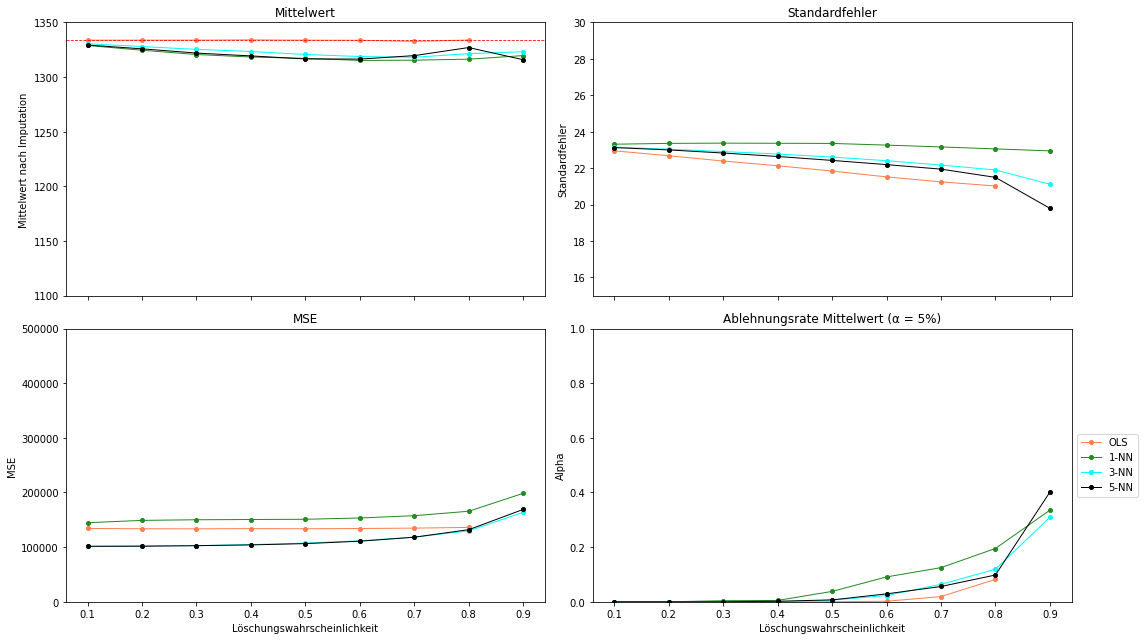

In [19]:
# Create a subplot with shared X-axis
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(16, 9))
(ax1, ax2), (ax3, ax4) = axs

# Plotting for the first plot
ax1.plot(df['chance'], df['Mean'], marker='o', color='coral', linewidth=1, markersize=4, label='Mean OLS')
ax1.plot(df['chance'], df['Mean KNN_1'], marker='o', color='forestgreen', linewidth=1, markersize=4, label='Mean 1-NN')
ax1.plot(df['chance'], df['Mean KNN_3'], marker='o', color='cyan', linewidth=1, markersize=4, label='Mean 3-NN')
ax1.plot(df['chance'], df['Mean KNN_5'], marker='o', color='black', linewidth=1, markersize=4, label='Mean 5-NN')
ax1.axhline(y=1333.96, color='red', linestyle='--', label='Population Mean', linewidth = 0.8)


ax1.set_ylim(1100, 1350)

# Use a light theme for the first plot
ax1.set_ylabel('Mittelwert nach Imputation')
ax1.set_title('Mittelwert')
# ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax1)


# Plotting for the third plot
ax2.plot(df['chance'], df['SE OLS'], marker='o', color='coral', linewidth=1, markersize=4, label='MSE OLS')
ax2.plot(df['chance'], df['SE KNN_1'], marker='o', color='forestgreen', linewidth=1, markersize=4, label='MSE 1-NN')
ax2.plot(df['chance'], df['SE KNN_3'], marker='o', color='cyan', linewidth=1, markersize=4, label='MSE 3-NN')
ax2.plot(df['chance'], df['SE KNN_5'], marker='o', color='black', linewidth=1, markersize=4, label='MSE 5-NN')
ax1.axhline(y=23.23, color='red', linestyle='--', label='Population SE', linewidth = 0.8)


ax2.set_ylim(15, 30)

# Use a light theme for the second plot
ax2.set_title('Standardfehler')
# ax2.set_xlabel('Löschungswahrscheinlichkeit')
ax2.set_ylabel('Standardfehler')
# ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Plotting for the second plot
ax3.plot(df['chance'], df['MSE OLS'], marker='o', color='coral', linewidth=1, markersize=4, label='MSE OLS')
ax3.plot(df['chance'], df['MSE KNN_1'], marker='o', color='forestgreen', linewidth=1, markersize=4, label='MSE 1-NN')
ax3.plot(df['chance'], df['MSE KNN_3'], marker='o', color='cyan', linewidth=1, markersize=4, label='MSE 3-NN')
ax3.plot(df['chance'], df['MSE KNN_5'], marker='o', color='black', linewidth=1, markersize=4, label='MSE 5-NN')

ax3.set_ylim(0, 500000)

# Use a light theme for the second plot
ax3.set_title('MSE')
ax3.set_xlabel('Löschungswahrscheinlichkeit')
ax3.set_ylabel('MSE')
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax3)





# Plotting for the fourth plot
ax4.plot(df['chance'], 1-df['Alpha OLS'], marker='o', color='coral', linewidth=1, markersize=4, label='OLS')
ax4.plot(df['chance'], 1-df['Alpha KNN_1'], marker='o', color='forestgreen', linewidth=1, markersize=4, label='1-NN')
ax4.plot(df['chance'], 1-df['Alpha KNN_3'], marker='o', color='cyan', linewidth=1, markersize=4, label='3-NN')
ax4.plot(df['chance'], 1-df['Alpha KNN_5'], marker='o', color='black', linewidth=1, markersize=4, label='5-NN')

ax4.set_ylim(0, 1)

# Use a light theme for the second plot
ax4.set_title('Ablehnungsrate Mittelwert (\u03B1 = 5%)')
ax4.set_xlabel('Löschungswahrscheinlichkeit')
ax4.set_ylabel('Alpha')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
# plt.savefig('follower_plot.pdf', format='pdf')
plt.show()

In [156]:
df

,chance,Mean,MSE OLS,SE OLS,Alpha OLS,Mean KNN_1,MSE KNN_1,SE KNN_1,Alpha KNN_1,Mean KNN_3,MSE KNN_3,SE KNN_3,Alpha KNN_3,Mean KNN_5,MSE KNN_5,SE KNN_5,Alpha KNN_5
0,0.1,1350.654079,93214.394859,22.754515,1.000,1336.636274,94773.361978,23.366837,1.000,1339.926808,79977.923840,23.172830,1.000,1340.111154,77808.031048,23.139681,1.000
1,0.2,1342.717482,109171.266734,22.620319,1.000,1333.503748,113732.178498,23.456144,1.000,1335.612003,90511.814695,23.146240,1.000,1335.475764,88667.398833,23.078110,1.000
2,0.3,1333.886374,120394.116869,22.486678,1.000,1329.293614,128407.510154,23.514026,1.000,1330.055123,100478.919637,23.103676,1.000,1329.306157,98463.932309,22.988195,1.000
3,0.4,1324.129049,129444.743413,22.311834,1.000,1323.379943,140260.580660,23.537638,1.000,1322.974362,109429.521597,23.021149,1.000,1321.850858,107268.779254,22.862047,1.000
4,0.5,1312.448407,137725.808151,22.094194,0.989,1316.920806,153226.756639,23.586148,0.987,1314.632116,118961.724710,22.936706,0.994,1312.524661,117625.851161,22.700036,0.992
5,0.6,1298.311640,145428.010821,21.821935,0.724,1306.680383,168365.325535,23.562801,0.922,1302.890592,131367.769381,22.762305,0.892,1299.548672,130949.207021,22.453588,0.796
6,0.7,1279.393721,154684.906835,21.366055,0.161,1292.920256,185857.543611,23.521860,0.620,1287.666709,145998.504808,22.552462,0.450,1284.192127,147045.617207,22.218369,0.327
7,0.8,1251.982184,168390.665471,20.626777,0.004,1270.516360,215165.820213,23.352500,0.217,1261.689288,171785.471021,22.063899,0.070,1255.623591,172230.588073,21.625899,0.031
8,0.9,1198.323464,204760.080006,18.875306,0.000,1227.443591,271251.430802,22.853686,0.029,1210.617081,226816.979501,21.046268,0.004,1191.129074,231710.171779,20.003894,0.000


In [9]:
df_mcar_std = pd.read_csv('MCAR_Simulation_Top5 (neu)')
df_mnar_01 = pd.read_csv('MNAR_Simulation_Top5_(0.1 und 0.1-0.9) (neu)')
df_mnar_02 = pd.read_csv('MNAR_Simulation_Top5_(0.2 und 0.1-0.9) (neu)')
df_mnar_03 = pd.read_csv('MNAR_Simulation_Top5_(0.3 und 0.1-0.9) (neu)')

df_mcar_std.rename(columns={'Unnamed: 0': 'chance'}, inplace=True)
df_mnar_01.rename(columns={'Unnamed: 0': 'chance'}, inplace=True)
df_mnar_02.rename(columns={'Unnamed: 0': 'chance'}, inplace=True)
df_mnar_03.rename(columns={'Unnamed: 0': 'chance'}, inplace=True)

df_ols_mean = pd.DataFrame({'chance': df_mcar_std['chance'], 'Mittelwert MCAR Std': df_mcar_std['Mean'], 'Mittelwert MNAR 0.1': df_mnar_01['Mean'], 'Mittelwert MNAR 0.2': df_mnar_02['Mean'], 'Mittelwert MNAR 0.3': df_mnar_03['Mean']})
df_ols_MSE = pd.DataFrame({'chance': df_mcar_std['chance'], 'MSE MCAR Std': df_mcar_std['MSE OLS'], 'MSE MNAR 0.1': df_mnar_01['MSE OLS'], 'MSE MNAR 0.2': df_mnar_02['MSE OLS'], 'MSE MNAR 0.3': df_mnar_03['MSE OLS']})
df_ols_SE = pd.DataFrame({'chance': df_mcar_std['chance'], 'SE MCAR Std': df_mcar_std['SE OLS'], 'SE MNAR 0.1': df_mnar_01['SE OLS'], 'SE MNAR 0.2': df_mnar_02['SE OLS'], 'SE MNAR 0.3': df_mnar_03['SE OLS']})
df_ols_alpha = pd.DataFrame({'chance': df_mcar_std['chance'], 'Alpha MCAR Std': df_mcar_std['Alpha OLS'], 'Alpha MNAR 0.1': df_mnar_01['Alpha OLS'], 'Alpha MNAR 0.2': df_mnar_02['Alpha OLS'], 'Alpha MNAR 0.3': df_mnar_03['Alpha OLS']})

df_knn1_mean = pd.DataFrame({'chance': df_mcar_std['chance'], 'Mittelwert MCAR Std': df_mcar_std['Mean KNN_1'], 'Mittelwert MNAR 0.1': df_mnar_01['Mean KNN_1'], 'Mittelwert MNAR 0.2': df_mnar_02['Mean KNN_1'], 'Mittelwert MNAR 0.3': df_mnar_03['Mean KNN_1']})
df_knn1_MSE = pd.DataFrame({'chance': df_mcar_std['chance'], 'MSE MCAR Std': df_mcar_std['MSE KNN_1'], 'MSE MNAR 0.1': df_mnar_01['MSE KNN_1'], 'MSE MNAR 0.2': df_mnar_02['MSE KNN_1'], 'MSE MNAR 0.3': df_mnar_03['MSE KNN_1']})
df_knn1_SE = pd.DataFrame({'chance': df_mcar_std['chance'], 'SE MCAR Std': df_mcar_std['SE KNN_1'], 'SE MNAR 0.1': df_mnar_01['SE KNN_1'], 'SE MNAR 0.2': df_mnar_02['SE KNN_1'], 'SE MNAR 0.3': df_mnar_03['SE KNN_1']})
df_knn1_alpha = pd.DataFrame({'chance': df_mcar_std['chance'], 'Alpha MCAR Std': df_mcar_std['Alpha KNN_1'], 'Alpha MNAR 0.1': df_mnar_01['Alpha KNN_1'], 'Alpha MNAR 0.2': df_mnar_02['Alpha KNN_1'], 'Alpha MNAR 0.3': df_mnar_03['Alpha KNN_1']})

df_knn3_mean = pd.DataFrame({'chance': df_mcar_std['chance'], 'Mittelwert MCAR Std': df_mcar_std['Mean KNN_3'], 'Mittelwert MNAR 0.1': df_mnar_01['Mean KNN_3'], 'Mittelwert MNAR 0.2': df_mnar_02['Mean KNN_3'], 'Mittelwert MNAR 0.3': df_mnar_03['Mean KNN_3']})
df_knn3_MSE = pd.DataFrame({'chance': df_mcar_std['chance'], 'MSE MCAR Std': df_mcar_std['MSE KNN_3'], 'MSE MNAR 0.1': df_mnar_01['MSE KNN_3'], 'MSE MNAR 0.2': df_mnar_02['MSE KNN_3'], 'MSE MNAR 0.3': df_mnar_03['MSE KNN_3']})
df_knn3_SE = pd.DataFrame({'chance': df_mcar_std['chance'], 'SE MCAR Std': df_mcar_std['SE KNN_3'], 'SE MNAR 0.1': df_mnar_01['SE KNN_3'], 'SE MNAR 0.2': df_mnar_02['SE KNN_3'], 'SE MNAR 0.3': df_mnar_03['SE KNN_3']})
df_knn3_alpha = pd.DataFrame({'chance': df_mcar_std['chance'], 'Alpha MCAR Std': df_mcar_std['Alpha KNN_3'], 'Alpha MNAR 0.1': df_mnar_01['Alpha KNN_3'], 'Alpha MNAR 0.2': df_mnar_02['Alpha KNN_3'], 'Alpha MNAR 0.3': df_mnar_03['Alpha OLS']})

df_knn5_mean = pd.DataFrame({'chance': df_mcar_std['chance'], 'Mittelwert MCAR Std': df_mcar_std['Mean KNN_5'], 'Mittelwert MNAR 0.1': df_mnar_01['Mean KNN_5'], 'Mittelwert MNAR 0.2': df_mnar_02['Mean KNN_5'], 'Mittelwert MNAR 0.3': df_mnar_03['Mean KNN_5']})
df_knn5_MSE = pd.DataFrame({'chance': df_mcar_std['chance'], 'MSE MCAR Std': df_mcar_std['MSE KNN_5'], 'MSE MNAR 0.1': df_mnar_01['MSE KNN_5'], 'MSE MNAR 0.2': df_mnar_02['MSE KNN_5'], 'MSE MNAR 0.3': df_mnar_03['MSE KNN_5']})
df_knn5_SE = pd.DataFrame({'chance': df_mcar_std['chance'], 'SE MCAR Std': df_mcar_std['SE KNN_5'], 'SE MNAR 0.1': df_mnar_01['SE KNN_5'], 'SE MNAR 0.2': df_mnar_02['SE KNN_5'], 'SE MNAR 0.3': df_mnar_03['SE KNN_5']})
df_knn5_alpha = pd.DataFrame({'chance': df_mcar_std['chance'], 'Alpha MCAR Std': df_mcar_std['Alpha KNN_5'], 'Alpha MNAR 0.1': df_mnar_01['Alpha KNN_5'], 'Alpha MNAR 0.2': df_mnar_02['Alpha KNN_5'], 'Alpha MNAR 0.3': df_mnar_03['Alpha KNN_5']})






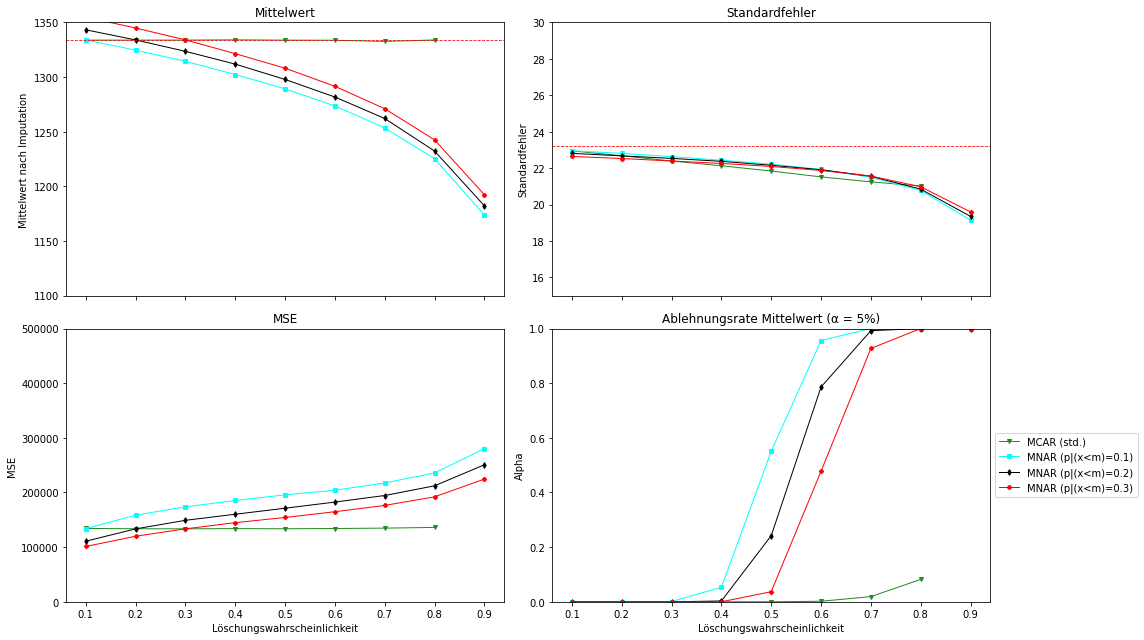

In [20]:
# Create a subplot with shared X-axis
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(16, 9))
(ax1, ax2), (ax3, ax4) = axs

# Plotting for the first plot
ax1.plot(df_ols_mean['chance'], df_ols_mean['Mittelwert MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax1.plot(df_ols_mean['chance'], df_ols_mean['Mittelwert MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax1.plot(df_ols_mean['chance'], df_ols_mean['Mittelwert MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax1.plot(df_ols_mean['chance'], df_ols_mean['Mittelwert MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')
ax1.axhline(y=1333.96, color='red', linestyle='--', label='Population Mean', linewidth = 0.8)


ax1.set_ylim(1100, 1350)

# Use a light theme for the first plot
ax1.set_ylabel('Mittelwert nach Imputation')
ax1.set_title('Mittelwert')
# ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax1)





# Plotting for the third plot
ax2.plot(df_ols_SE['chance'], df_ols_SE['SE MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax2.plot(df_ols_SE['chance'], df_ols_SE['SE MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax2.plot(df_ols_SE['chance'], df_ols_SE['SE MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax2.plot(df_ols_SE['chance'], df_ols_SE['SE MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')
ax2.axhline(y=23.23, color='red', linestyle='--', label='Population SE', linewidth = 0.8)


ax2.set_ylim(15, 30)

# Use a light theme for the second plot
ax2.set_title('Standardfehler')
# ax2.set_xlabel('Löschungswahrscheinlichkeit')
ax2.set_ylabel('Standardfehler')
# ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax2)







# Plotting for the second plot
ax3.plot(df_ols_SE['chance'], df_ols_MSE['MSE MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax3.plot(df_ols_SE['chance'], df_ols_MSE['MSE MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax3.plot(df_ols_SE['chance'], df_ols_MSE['MSE MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax3.plot(df_ols_SE['chance'], df_ols_MSE['MSE MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')

ax3.set_ylim(0, 500000)

# Use a light theme for the second plot
ax3.set_title('MSE')
ax3.set_xlabel('Löschungswahrscheinlichkeit')
ax3.set_ylabel('MSE')
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax3)





# Plotting for the fourth plot
ax4.plot(df_ols_SE['chance'], 1-df_ols_alpha['Alpha MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax4.plot(df_ols_SE['chance'], 1-df_ols_alpha['Alpha MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax4.plot(df_ols_SE['chance'], 1-df_ols_alpha['Alpha MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax4.plot(df_ols_SE['chance'], 1-df_ols_alpha['Alpha MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')

ax4.set_ylim(0, 1)

# Use a light theme for the second plot
ax4.set_title('Ablehnungsrate Mittelwert (\u03B1 = 5%)')
ax4.set_xlabel('Löschungswahrscheinlichkeit')
ax4.set_ylabel('Alpha')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax4)

plt.tight_layout()
# plt.savefig('follower_plot.pdf', format='pdf')
plt.show()

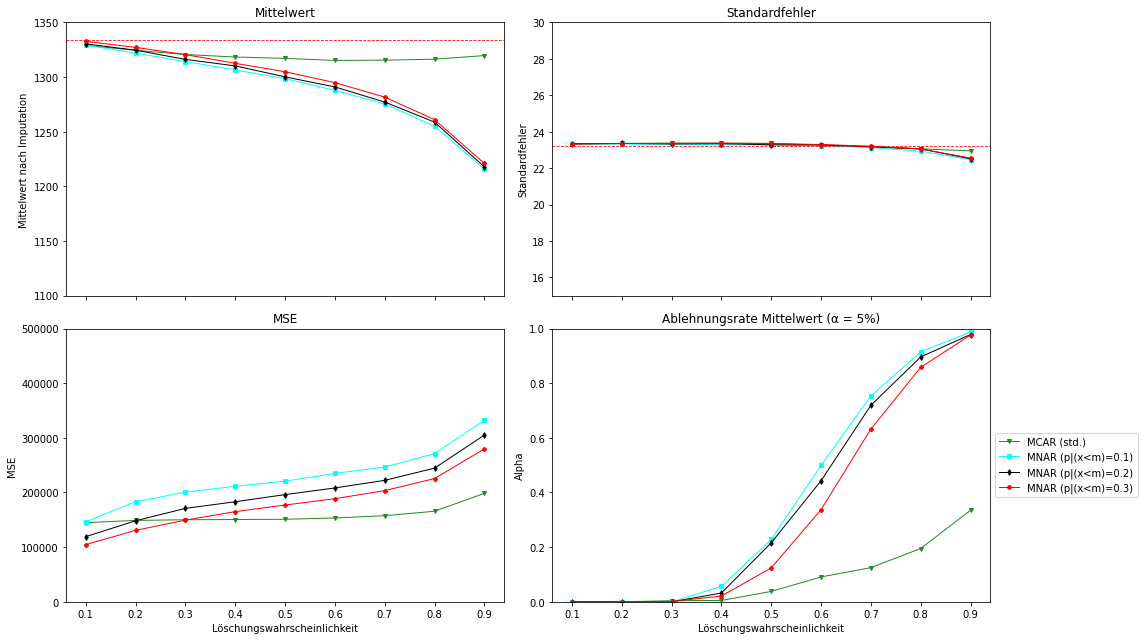

In [22]:
# Create a subplot with shared X-axis
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(16, 9))
(ax1, ax2), (ax3, ax4) = axs

# Plotting for the first plot
ax1.plot(df_knn1_mean['chance'], df_knn1_mean['Mittelwert MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax1.plot(df_knn1_mean['chance'], df_knn1_mean['Mittelwert MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax1.plot(df_knn1_mean['chance'], df_knn1_mean['Mittelwert MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax1.plot(df_knn1_mean['chance'], df_knn1_mean['Mittelwert MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')
ax1.axhline(y=1333.96, color='red', linestyle='--', label='Population Mean', linewidth = 0.8)


ax1.set_ylim(1100, 1350)

# Use a light theme for the first plot
ax1.set_ylabel('Mittelwert nach Imputation')
ax1.set_title('Mittelwert')
# ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax1)





# Plotting for the third plot
ax2.plot(df_knn1_SE['chance'], df_knn1_SE['SE MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax2.plot(df_knn1_SE['chance'], df_knn1_SE['SE MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax2.plot(df_knn1_SE['chance'], df_knn1_SE['SE MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax2.plot(df_knn1_SE['chance'], df_knn1_SE['SE MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')
ax2.axhline(y=23.23, color='red', linestyle='--', label='Population SE', linewidth = 0.8)


ax2.set_ylim(15, 30)

# Use a light theme for the second plot
ax2.set_title('Standardfehler')
# ax2.set_xlabel('Löschungswahrscheinlichkeit')
ax2.set_ylabel('Standardfehler')
# ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax2)







# Plotting for the second plot
ax3.plot(df_knn1_SE['chance'], df_knn1_MSE['MSE MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax3.plot(df_knn1_SE['chance'], df_knn1_MSE['MSE MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax3.plot(df_knn1_SE['chance'], df_knn1_MSE['MSE MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax3.plot(df_knn1_SE['chance'], df_knn1_MSE['MSE MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')

ax3.set_ylim(0, 500000)

# Use a light theme for the second plot
ax3.set_title('MSE')
ax3.set_xlabel('Löschungswahrscheinlichkeit')
ax3.set_ylabel('MSE')
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax3)





# Plotting for the fourth plot
ax4.plot(df_knn1_MSE['chance'], 1-df_knn1_alpha['Alpha MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax4.plot(df_knn1_MSE['chance'], 1-df_knn1_alpha['Alpha MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax4.plot(df_knn1_MSE['chance'], 1-df_knn1_alpha['Alpha MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax4.plot(df_knn1_MSE['chance'], 1-df_knn1_alpha['Alpha MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')

ax4.set_ylim(0, 1)

# Use a light theme for the second plot
ax4.set_title('Ablehnungsrate Mittelwert (\u03B1 = 5%)')
ax4.set_xlabel('Löschungswahrscheinlichkeit')
ax4.set_ylabel('Alpha')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax4)

plt.tight_layout()
# plt.savefig('follower_plot.pdf', format='pdf')
plt.show()

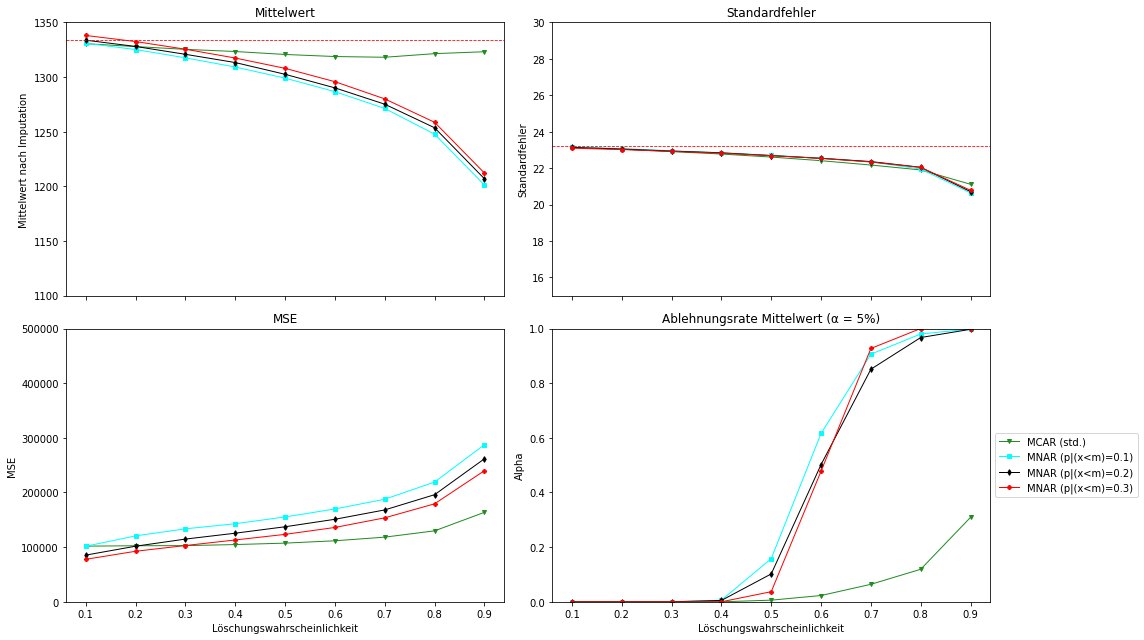

In [23]:
# Create a subplot with shared X-axis
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(16, 9))
(ax1, ax2), (ax3, ax4) = axs

# Plotting for the first plot
ax1.plot(df_knn3_mean['chance'], df_knn3_mean['Mittelwert MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax1.plot(df_knn3_mean['chance'], df_knn3_mean['Mittelwert MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax1.plot(df_knn3_mean['chance'], df_knn3_mean['Mittelwert MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax1.plot(df_knn3_mean['chance'], df_knn3_mean['Mittelwert MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')
ax1.axhline(y=1333.96, color='red', linestyle='--', label='Population Mean', linewidth = 0.8)


ax1.set_ylim(1100, 1350)

# Use a light theme for the first plot
ax1.set_ylabel('Mittelwert nach Imputation')
ax1.set_title('Mittelwert')
# ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax1)





# Plotting for the third plot
ax2.plot(df_knn3_SE['chance'], df_knn3_SE['SE MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax2.plot(df_knn3_SE['chance'], df_knn3_SE['SE MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax2.plot(df_knn3_SE['chance'], df_knn3_SE['SE MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax2.plot(df_knn3_SE['chance'], df_knn3_SE['SE MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')
ax2.axhline(y=23.23, color='red', linestyle='--', label='Population SE', linewidth = 0.8)


ax2.set_ylim(15, 30)

# Use a light theme for the second plot
ax2.set_title('Standardfehler')
# ax2.set_xlabel('Löschungswahrscheinlichkeit')
ax2.set_ylabel('Standardfehler')
# ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax2)







# Plotting for the second plot
ax3.plot(df_knn3_MSE['chance'], df_knn3_MSE['MSE MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax3.plot(df_knn3_MSE['chance'], df_knn3_MSE['MSE MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax3.plot(df_knn3_MSE['chance'], df_knn3_MSE['MSE MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax3.plot(df_knn3_MSE['chance'], df_knn3_MSE['MSE MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')

ax3.set_ylim(0, 500000)

# Use a light theme for the second plot
ax3.set_title('MSE')
ax3.set_xlabel('Löschungswahrscheinlichkeit')
ax3.set_ylabel('MSE')
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax3)





# Plotting for the fourth plot
ax4.plot(df_knn3_alpha['chance'], 1-df_knn3_alpha['Alpha MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax4.plot(df_knn3_alpha['chance'], 1-df_knn3_alpha['Alpha MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax4.plot(df_knn3_alpha['chance'], 1-df_knn3_alpha['Alpha MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax4.plot(df_knn3_alpha['chance'], 1-df_knn3_alpha['Alpha MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')

ax4.set_ylim(0, 1)

# Use a light theme for the second plot
ax4.set_title('Ablehnungsrate Mittelwert (\u03B1 = 5%)')
ax4.set_xlabel('Löschungswahrscheinlichkeit')
ax4.set_ylabel('Alpha')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax4)

plt.tight_layout()
# plt.savefig('follower_plot.pdf', format='pdf')
plt.show()

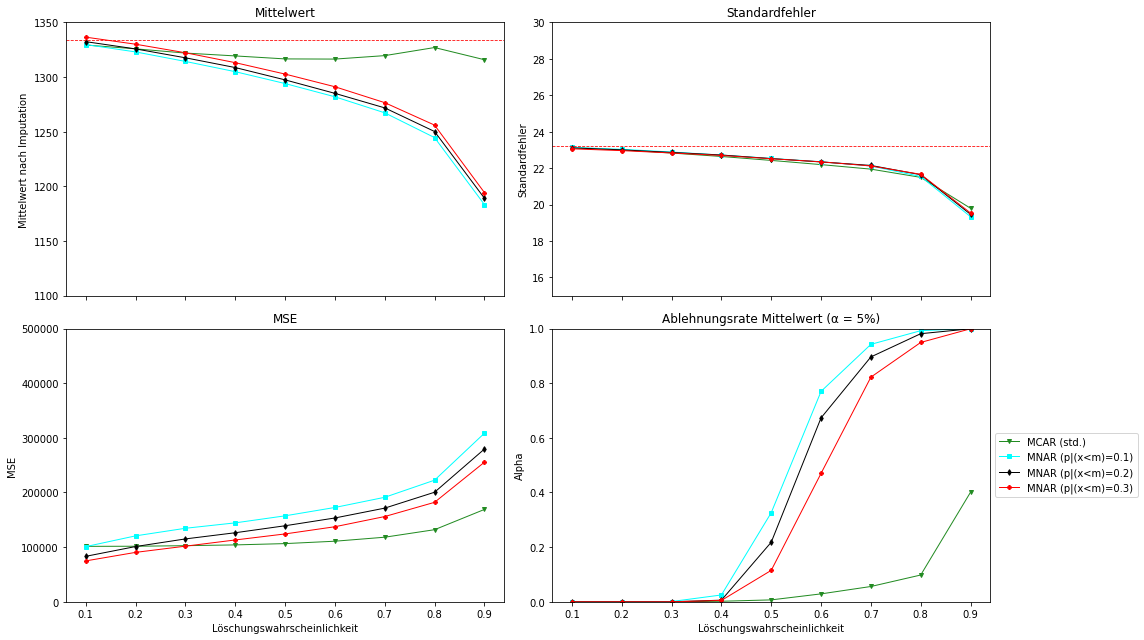

In [24]:
# Create a subplot with shared X-axis
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(16, 9))
(ax1, ax2), (ax3, ax4) = axs

# Plotting for the first plot
ax1.plot(df_knn5_mean['chance'], df_knn5_mean['Mittelwert MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax1.plot(df_knn5_mean['chance'], df_knn5_mean['Mittelwert MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax1.plot(df_knn5_mean['chance'], df_knn5_mean['Mittelwert MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax1.plot(df_knn5_mean['chance'], df_knn5_mean['Mittelwert MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')
ax1.axhline(y=1333.96, color='red', linestyle='--', label='Population Mean', linewidth = 0.8)


ax1.set_ylim(1100, 1350)

# Use a light theme for the first plot
ax1.set_ylabel('Mittelwert nach Imputation')
ax1.set_title('Mittelwert')
# ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax1)





# Plotting for the third plot
ax2.plot(df_knn5_SE['chance'], df_knn5_SE['SE MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax2.plot(df_knn5_SE['chance'], df_knn5_SE['SE MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax2.plot(df_knn5_SE['chance'], df_knn5_SE['SE MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax2.plot(df_knn5_SE['chance'], df_knn5_SE['SE MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')
ax2.axhline(y=23.23, color='red', linestyle='--', label='Population SE', linewidth = 0.8)


ax2.set_ylim(15, 30)

# Use a light theme for the second plot
ax2.set_title('Standardfehler')
# ax2.set_xlabel('Löschungswahrscheinlichkeit')
ax2.set_ylabel('Standardfehler')
# ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax2)







# Plotting for the second plot
ax3.plot(df_knn5_MSE['chance'], df_knn5_MSE['MSE MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax3.plot(df_knn5_MSE['chance'], df_knn5_MSE['MSE MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax3.plot(df_knn5_MSE['chance'], df_knn5_MSE['MSE MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax3.plot(df_knn5_MSE['chance'], df_knn5_MSE['MSE MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')

ax3.set_ylim(0, 500000)

# Use a light theme for the second plot
ax3.set_title('MSE')
ax3.set_xlabel('Löschungswahrscheinlichkeit')
ax3.set_ylabel('MSE')
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax3)





# Plotting for the fourth plot
ax4.plot(df_knn5_alpha['chance'], 1-df_knn5_alpha['Alpha MCAR Std'], marker='v', color='forestgreen', linewidth=1, markersize=4, label='MCAR (std.)')
ax4.plot(df_knn5_alpha['chance'], 1-df_knn5_alpha['Alpha MNAR 0.1'], marker='s', color='cyan', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.1)')
ax4.plot(df_knn5_alpha['chance'], 1-df_knn5_alpha['Alpha MNAR 0.2'], marker='d', color='black', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.2)')
ax4.plot(df_knn5_alpha['chance'], 1-df_knn5_alpha['Alpha MNAR 0.3'], marker='P', color='red', linewidth=1, markersize=4, label='MNAR (p|(x<m)=0.3)')

ax4.set_ylim(0, 1)

# Use a light theme for the second plot
ax4.set_title('Ablehnungsrate Mittelwert (\u03B1 = 5%)')
ax4.set_xlabel('Löschungswahrscheinlichkeit')
ax4.set_ylabel('Alpha')
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add underglow
# mplcyberpunk.add_underglow(ax4)

plt.tight_layout()
# plt.savefig('follower_plot.pdf', format='pdf')
plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


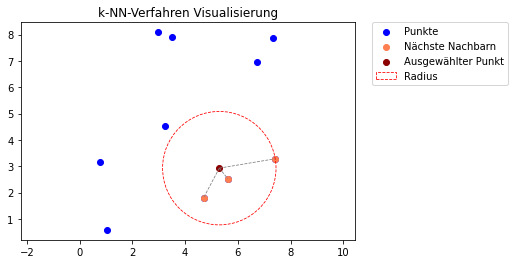

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Generiere zufällige Punkte
np.random.seed(69)
points = np.random.rand(10, 2)*10

# Wähle zufällig einen Punkt aus
query_point = np.random.rand(1, 2)*10

# Berechne die 3 nächsten Nachbarn des ausgewählten Punktes
nbrs = NearestNeighbors(n_neighbors=3, algorithm='auto').fit(points)
distances, indices = nbrs.kneighbors(query_point)

# Extrahiere die Indizes der 3 nächsten Nachbarn
nearest_neighbors_indices = indices.flatten()

# Plotte die Punkte
plt.scatter(points[:, 0], points[:, 1], c='blue', label='Punkte')
plt.scatter(points[nearest_neighbors_indices, 0], points[nearest_neighbors_indices, 1], c='coral', marker='o', label='Nächste Nachbarn')
plt.scatter(query_point[:, 0], query_point[:, 1], c='darkred', marker='o', label='Ausgewählter Punkt')

# Berechne den Radius des Kreises um den ausgewählten Punkt
radius = distances.flatten()[-1] + 0.01

# Zeichne den Kreis um den ausgewählten Punkt
circle = plt.Circle((query_point[:, 0], query_point[:, 1]), radius, color='red', fill=False, linewidth = 0.8, linestyle='--', label='Radius')
plt.gca().add_patch(circle)

# Zeichne Linien zwischen dem ausgewählten Punkt und seinen nächsten Nachbarn
for neighbor_index in nearest_neighbors_indices:
    neighbor_point = points[neighbor_index]
    plt.plot([query_point[:, 0], neighbor_point[0]], [query_point[:, 1], neighbor_point[1]], color='gray', linewidth = 0.8, linestyle='--')

plt.xlim([0, 10])

# Setze die Achsenbeschriftung und die Legende
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0., markerscale=1)

# Zeige den Plot an
plt.axis('equal')
plt.title('k-NN-Verfahren Visualisierung')
plt.show()


In [32]:
np.random.seed(69)
points = np.random.rand(10, 2)*10
points

array([[2.96249162, 8.09067716],
       [3.50252525, 7.89409256],
       [5.61348976, 2.53588954],
       [1.04977084, 0.58460729],
       [6.73292381, 6.97829657],
       [7.32783206, 7.87874058],
       [0.7637632 , 3.17680597],
       [7.41023277, 3.28494229],
       [4.70145485, 1.81085718],
       [3.23504402, 4.54906156]])

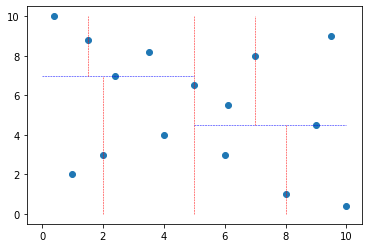

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Erstellen von zufälligen Punkten
points = np.array([[1,2], [6,3], [5,6.5], [7,8], [8,1], [9,4.5], [2.4, 7], [3.5, 8.2], [1.5, 8.8], [0.4, 10], [10, 0.4], [6.1, 5.5], [9.5, 9], [2,3], [4,4]])

# Punkte plotten
plt.scatter(points[:, 0], points[:, 1])

# Vertikale, rote, gestrichelte Linie
plt.plot([5, 5], [0, 10], 'r--', linewidth=0.5)

# Horizontale, blaue, gestrichelte Linien
plt.plot([0, 5], [7, 7], 'b--', linewidth=0.5)
plt.plot([5, 10], [4.5, 4.5], 'b--', linewidth=0.5)

plt.plot([7, 7], [4.5, 10], 'r--', linewidth=0.5)
plt.plot([2, 2], [0, 7], 'r--', linewidth=0.5)

# Weitere vertikale, rote, gestrichelte Linien
plt.plot([1.5, 1.5], [7, 10], 'r--', linewidth=0.5)
plt.plot([8, 8], [0, 4.5], 'r--', linewidth=0.5)




plt.savefig("Visualisierung KD-Tree.pdf")

plt.show()


